## Динамическая настройка параметров в социально-демографическом рекламном сервере

Предлагается исследовать зависимость количества показов рекламы и точности попадания в целевую аудиторию от алгоритма показа рекламы на рекламном сервере (крутилке), чтобы по результатам исследования построить оптимальный алгоритм.

#### Описание используемых программных средств
- Используемый язык программирования: python3
- Используемые библиотеки: numpy, matplotlib
- Пользовательский интерфейс: сайт на python3 с использованием CGI (Common Gateway Interface)


#### Модули
- <a href="#Численное-интегрирование">Интегрирование</a>
- <a href="#Решение-систем-линейных-алгебраических-уравнений">Решение систем линейных алгебраических уравнений</a>
- <a href="#Численное-интерполирование">Интерполирование</a>
- <a href="#Численное-решение-задачи-Коши">Решение задачи Коши</a>

### Численное интегрирование
#### Метод средних прямоугольников

$$
    \int_{0}^{1} f(x) dx \approx \sum_{i=1}^{n} f \left( \frac{x_{i-1} + x_i}{2} \right) (x_i - x_{i-1})
$$

Аргументы: [0, 1]

Шаг: 1/*segm_numb*

Погрешность (второй порядок точности по h):

$$
    \frac{1}{24} (b - a)h^2 \max_{x \in [a, b]}{\mid f''(x) \mid}  = \frac{1}{24} h^2 \max_{x \in [0, 1]}{\mid f''(x) \mid}
$$

*func*: list of pairs (func argument, func value)

Пример: [(1, 4), (2, 5), (3, 6)]

In [3]:
def integrate_list(func):
    integral = 0
    for i in range(1, len(func)):
        integral += (func[i][0] - func[i - 1][0]) * (func[i][1] + func[i - 1][1]) / 2
    return integral

#### Примеры функций

In [4]:
# гладкая функция
# Integral on [0, 1] == 3.5
def s_func1(x):
    return 9*x - 3*(x**2)

# разрывная функция
# Integral on [0, 1] == 0.5
def d_func1(x):
    if x < 0.5:
        return x / 2
    else:
        return x / 2 + 0.5

# осциллирующая функция
# Integral on [0, 1] == -0.0050774
def o_func1(x):
    return x*np.cos(100*x)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#### Функция табулирования функции 'func'

In [1]:
def tabulate(func, args, segm_numb, file_name):
    f = open(file_name, 'w')
    x = 0
    n = 0
    while n <= segm_numb:
        f.write(str(x) + ' ' + str(func(x, *args)) + '\n')
        x += 1 / segm_numb
        n += 1
    f.close()

#### Функция интегрирования функции 'func_file_name' 

In [2]:
def integrate(func_file_name):
    func_file = open(func_file_name, 'r')

    func = []
    for line in func_file:
        x, y = line.split()
        func.append((float(x), float(y)))
    
    func_file.close()
    return integrate_list(func)

#### График погрешностей в осях (log(Error), log(Number of segments))

In [6]:
def error_plot(func, true_int, func_id, xlim_max, title):
    int_values_idx = []
    int_values = []

    for segm_numb in range(2, xlim_max, 2):
        tabulate(func, (), segm_numb, 'test_func.txt')
        int_values_idx.append(np.log(segm_numb))
        int_values.append(np.log(abs(integrate('test_func.txt') - true_int)))

    fig = plt.figure(figsize=(10, 6))
    fig.suptitle('Error change: ' + title, fontsize=18)
    plt.plot(int_values_idx, int_values, linewidth=1.5, linestyle="-")
    plt.xlabel('log(Number of segments)', fontsize=14)
    plt.ylabel('log(Error)', fontsize=14)
    
    k = np.polyfit(int_values_idx, int_values, 1)[1]
    b = np.polyfit(int_values_idx, int_values, 1)[0]
    
    return np.polyfit(int_values_idx, int_values, 1)

#### График функции

In [7]:
def plot(func, func_id, title):
    tabulate(func, (), 400, 'test_func.txt')
    func_file = open('test_func.txt', 'r')

    func_idx = []
    func = []
    for line in func_file:
        x, y = line.split()
        func_idx.append(float(x))
        func.append(float(y))

    fig = plt.figure(figsize=(10, 6))
    fig.suptitle(title, fontsize=18)
    plt.plot(func_idx, func, linewidth=1.5, linestyle="-")
    plt.xlim(0, 1)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)

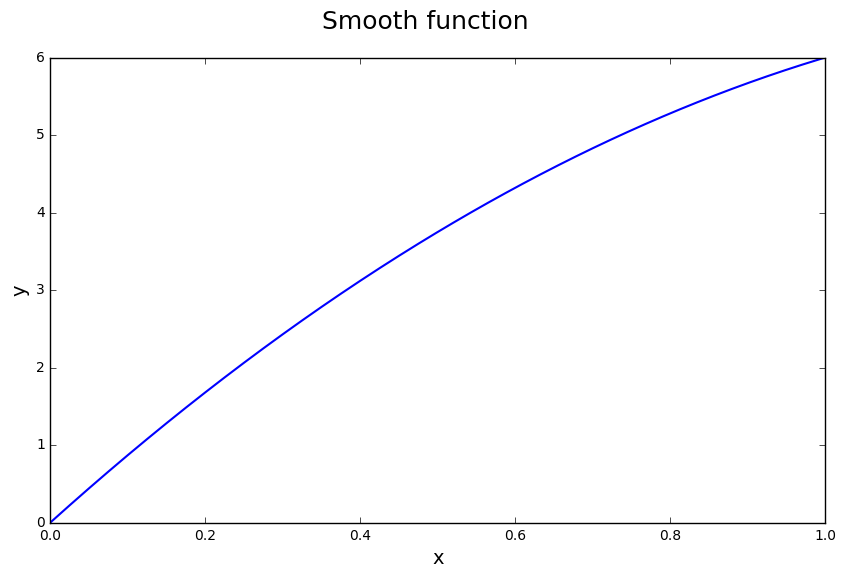

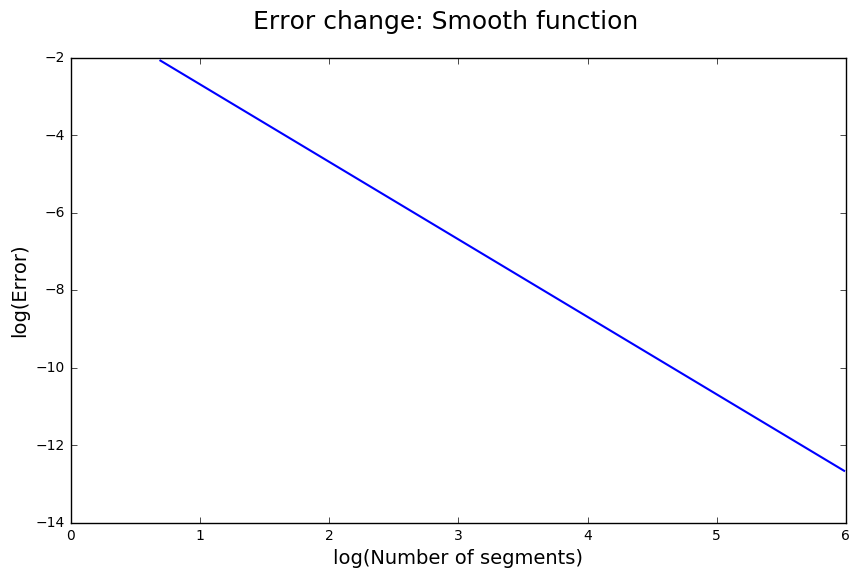

In [8]:
plot(s_func1, 's_func1', "Smooth function")
coef = error_plot(s_func1, 3.5, 's_func1', 400, "Smooth function")

Наклон и сдвиг

In [9]:
coef

array([-2.        , -0.69314718])

Таким образом, порядок аппроксимации равен $k = -coef[0] = 2$, а константа погрешности $c = coef[1] = -0.69$, т.е. погрешность $ E(h) = -0.69 h^2 $.

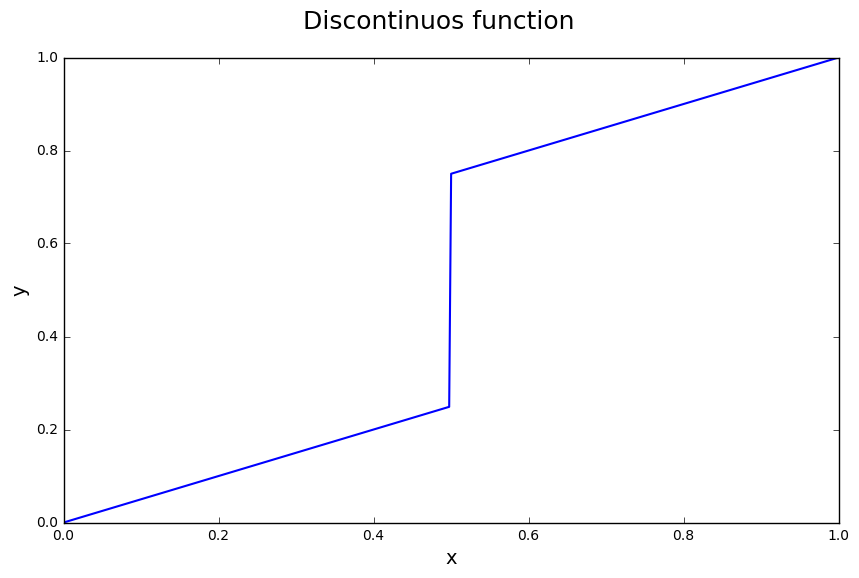

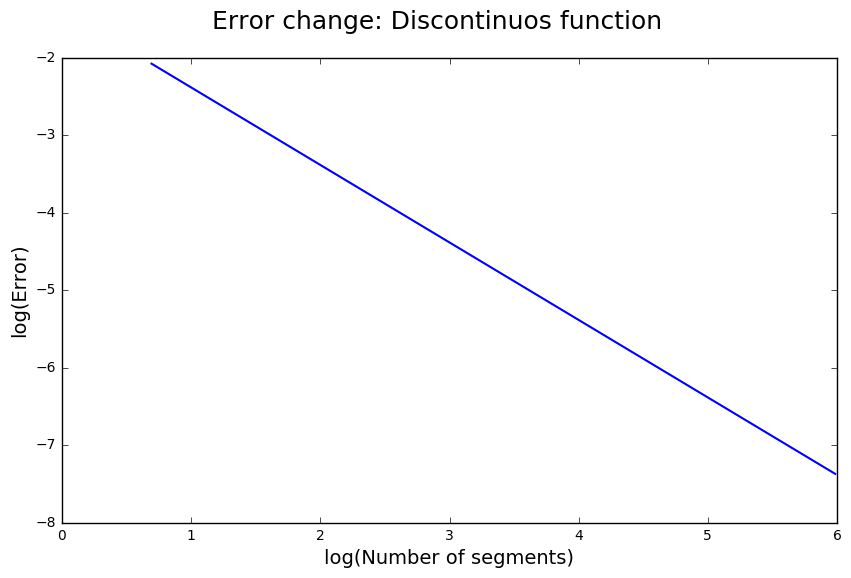

In [10]:
plot(d_func1, 'd_func1', "Discontinuos function")
coef = error_plot(d_func1, 0.5, 'd_func1', 400, "Discontinuos function")

Сдвиг и наклон

In [11]:
coef

array([-1.        , -1.38629436])

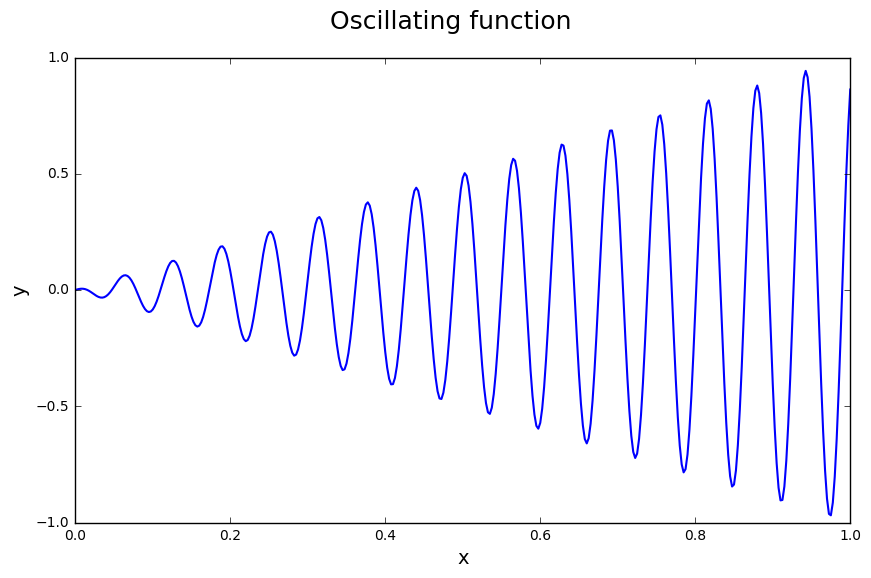

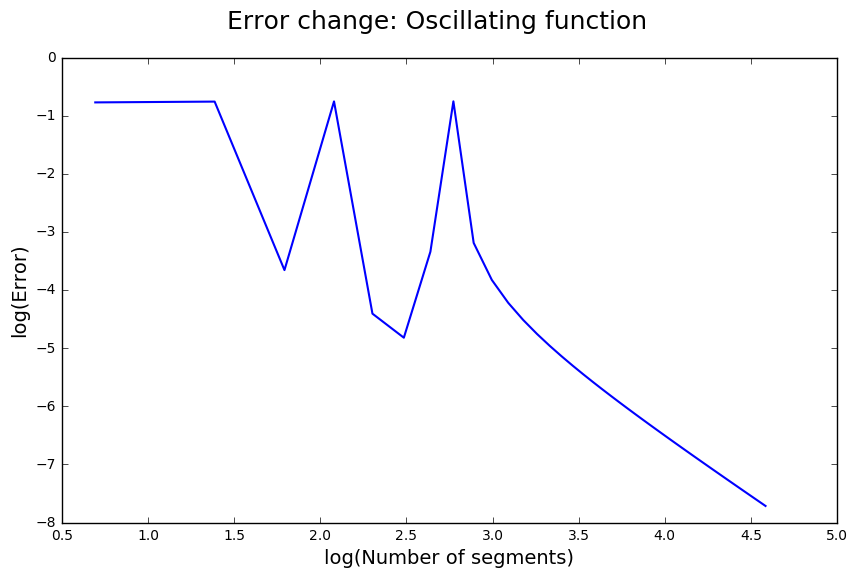

In [12]:
plot(o_func1, 'o_func1', "Oscillating function")
coef = error_plot(o_func1, -0.0050774, 'o_func1', 100, "Oscillating function")

Сдвиг и наклон

In [13]:
coef

array([-2.02664706,  1.68005819])

Погрешность осциллирующей функции колеблется на негустых сетках, так как некотрые колебания просто не учитываются. Чтобы поймать все осциляции, нужно брать гуще сетку.

### Решение систем линейных алгебраических уравнений

#### Метод Гаусса с выбором главного элемента по столбцу

Присвоем номер 1 тому уравнению, в котором коэффициент при $x_1$ наибольший по модулю. Этот коэффициент отличен от нуля, так как противное означало бы, что матрица $A$ имеет нулевой первый столбец, то есть вырождена. После этой перенумерации уравнений сделаем первый шаг метода Гаусса:

Поделим первое уравнение системы на $a_{11}$; $(n - 1)$ раз умножим это уравнение на $a_{i1}$ и вычтем его из $i-го$ уравнения системы.

Затем этот же процесс применяется к подматрице $A^{(1)} = (a_{ij}^{(1)})_{i,j=2,...,n} \in M_{n - 1}$ и так далее.

Применимость: ко всем невырожденным матрицам.

Главный элемент выбирается для того, чтобы уменьшить вычислительную погрешность. Погрешность будет наименьшей, если модуль отношения ${a_{i1}}/{a_{11}}$ наименьший из возможных.

Ассимптотическое количество операций: $\frac{2}{3} n^3 + O(n^2)$

In [14]:
import numpy as np

def sle_gauss(A, b):
    """
    Solves system of linear equations: A*x=b
    
    Args:
        A (numpy.ndarray)
        b (numpy.ndarray)
    
    Returns:
        x (numpy.ndarray)
    """
    X = np.hstack((A, np.split(b, len(b)))).astype(float)

    # Forward Elimination
    for step in range(len(X)):
        maxi = np.argmax(X[step:, step]) + step
        X[step], X[maxi] = X[maxi].copy(), X[step].copy()
        
        X[step] = X[step] / X[step][step]

        for i in range(step + 1, len(X)):
            X[i] -= X[step] * X[i][step]
        
    
    # Back Substitution
    for i in range(len(X) - 2, -1, -1):
        for j in range(i + 1, len(X)):
            X[i] -= X[j] * X[i, j]

    return X[:, -1]

In [15]:
A = np.asarray([[1, 2, 3], [2.001, 3.999, 6], [15, 3, 6]])
print('A:', A)
b = np.asarray([1, 2, 3])
print('b:', b)

print('Определитель:', np.linalg.det(A))

print('Бесконенчая норма:', np.linalg.norm(A, np.inf))

print('Число обусловленности:', np.linalg.cond(A, np.inf))

x = sle_gauss(A, b)
print('Решение:', x)

print('Модуль невязки:', np.linalg.norm(A.dot(x) - b))

A: [[  1.      2.      3.   ]
 [  2.001   3.999   6.   ]
 [ 15.      3.      6.   ]]
b: [1 2 3]
Определитель: 0.036
Бесконенчая норма: 24.0
Число обусловленности: 77998.0
Решение: [ 0.08333333  0.08333333  0.25      ]
Модуль невязки: 4.4408920985e-16


In [16]:
from scipy.linalg import hilbert

A = hilbert(8)
print('A:', A)
b = np.asarray([1, 2, 3, 4, 5, 6, 7, 8])
print('b:', b)

print('Определитель:', np.linalg.det(A))

print('Бесконенчая норма:', np.linalg.norm(A, np.inf))

print('Число обусловленности:', np.linalg.cond(A, np.inf))

x = sle_gauss(A, b)
print('Решение:', x)

print('Модуль невязки:', np.linalg.norm(A.dot(x) - b))

A: [[ 1.          0.5         0.33333333  0.25        0.2         0.16666667
   0.14285714  0.125     ]
 [ 0.5         0.33333333  0.25        0.2         0.16666667  0.14285714
   0.125       0.11111111]
 [ 0.33333333  0.25        0.2         0.16666667  0.14285714  0.125
   0.11111111  0.1       ]
 [ 0.25        0.2         0.16666667  0.14285714  0.125       0.11111111
   0.1         0.09090909]
 [ 0.2         0.16666667  0.14285714  0.125       0.11111111  0.1
   0.09090909  0.08333333]
 [ 0.16666667  0.14285714  0.125       0.11111111  0.1         0.09090909
   0.08333333  0.07692308]
 [ 0.14285714  0.125       0.11111111  0.1         0.09090909  0.08333333
   0.07692308  0.07142857]
 [ 0.125       0.11111111  0.1         0.09090909  0.08333333  0.07692308
   0.07142857  0.06666667]]
b: [1 2 3 4 5 6 7 8]
Определитель: 2.73705013545e-33
Бесконенчая норма: 2.71785714286
Число обусловленности: 33872790819.5
Решение: [ -5.11999995e+02   3.17519996e+04  -4.68719994e+05   2.81819996e+06

In [17]:
A = np.asarray([[10**6, 2], [10**13, 2]])
print('A:', A)
b = np.asarray([1, 2])
print('b:', b)

print('Определитель:', np.linalg.det(A))

print('Бесконенчая норма:', np.linalg.norm(A, np.inf))

print('Число обусловленности:', np.linalg.cond(A, np.inf))

x = sle_gauss(A, b)
print('Решение:', x)

print('Модуль невязки:', np.linalg.norm(A.dot(x) - b))

A: [[       1000000              2]
 [10000000000000              2]]
b: [1 2]
Определитель: -1.9999998e+13
Бесконенчая норма: 1e+13
Число обусловленности: 5.000001e+12
Решение: [  1.00000010e-13   4.99999950e-01]
Модуль невязки: 0.0


### Численное интерполирование

#### Интерполирование кубическим сплайном дефекта 1

Методом Гаусса решается система линейных уравнений:

$$
\begin{bmatrix}
    \frac{\tau_0 + \tau_1}{3} & \frac{\tau_1}{6} & 0 & \dots & 0 \\
    \frac{\tau_1}{6} & \frac{\tau_1 + \tau_2}{3} & \frac{\tau_2}{6} & \dots & 0 \\
    \dots & \dots & \dots & \dots & \dots\\
    \dots & \dots & \dots & \dots & \dots\\
    \dots & \dots & \dots & \dots & \dots\\
\end{bmatrix}
\begin{bmatrix}
    m_1 \\
    m_2 \\
    \dots \\
    \dots \\
    m_{N - 1} \\
\end{bmatrix}
=
\begin{bmatrix}
    \frac{f_2 - f_1}{\tau_1} - \frac{f_1 - f_0}{\tau_0} \\
    \dots \\
    \frac{f_{n + 1} - f_n}{\tau_n} - \frac{f_n - f_{n - 1}}{\tau_{n - 1}} \\
    \dots \\
    \frac{f_N - f_{N - 1}}{\tau_{N - 1}} - \frac{f_{N - 1} - f_{N - 2}}{\tau_{N - 2}} \\
\end{bmatrix}
$$

где $ \tau_n = t_{n + 1} - t_n $

Далее вычисляются:

$
A_n = \frac{f_{n + 1} - f_n}{\tau_n} - \frac{\tau_n}{6} (m_{n + 1} - m_n)
$

$
B_n = f_n - \frac{1}{6} m_n \tau_n ^2 - A_n t_n
$

Итоговый кубический многочлен для каждого $ n \in \{ 0, N - 1 \} $ вычисляется по формуле:

$
S_n (t) = \frac{1}{6 \tau_n} (m_n (t_{n + 1} - t)^3 + m_{n + 1} (t - t_n)^3 ) + A_n t + B_n
$

#### Примеры функций

In [18]:
import numbers

# гладкая функция
def s_func1(x):
    return 9*x - 3*(x**2)

# разрывная функция
def d_func1(x):
    if isinstance(x, numbers.Number):
        if x < 0.5:
            return x / 2
        else:
            return x / 2 + 0.5
    else:
        ans = []
        for xi in x:
            if xi < 0.5:
                ans.append(xi / 2)
            else:
                ans.append(xi / 2 + 0.5)
        return np.asarray(ans)

# осциллирующая функция
def o_func1(x):
    return x*np.cos(100*x)

#### Табулирование

In [19]:
def tabulate(func, args, segm_numb, file_name):
    f = open(file_name, 'w')
    x = 0
    n = 0
    while n <= segm_numb:
        f.write(str(x) + ' ' + str(func(x, *args)) + '\n')
        x += 1 / segm_numb
        n += 1
    f.close()

#### Функция интерполирования

Считывает значения из файла func_file_name

Возвращает numpy.ndarray размера $ N * 4 $, где в каждой строке стоят 4 коэффициента соответствующего многочлена $S_n$

In [20]:
def spline_interpolation(func_file_name):
    func_file = open(func_file_name, 'r')
    func = []
    for line in func_file:
        x, y = line.split()
        func.append((float(x), float(y)))
    func_file.close()
    
    N = len(func) - 1
    
    tau = np.zeros(N)
    for i in range(N):
        tau[i] = func[i + 1][0] - func[i][0]
    
    T = np.zeros((N - 1, N - 1))
    for i in range(N - 1):
        T[i][i] = (tau[i] + tau[i + 1]) / 3
    for i in range(N - 2):
        T[i + 1][i] = (tau[i + 1]) / 6
        T[i][i + 1] = (tau[i + 1]) / 6
    
    F = np.zeros(N - 1)
    for i in range(N - 1):
        F[i] = (func[i + 2][1] - func[i + 1][1]) / tau[i + 1] - (func[i + 1][1] - func[i][1]) / tau[i]
    
    M = sle_gauss(T, F)
    M = np.hstack((np.asarray([0]), M, np.asarray([0])))
    
    A = np.zeros(N)
    B = np.zeros(N)
    for i in range(N):
        A[i] = (func[i + 1][1] - func[i][1]) / tau[i] - tau[i] / 6 * (M[i + 1] - M[i])
        B[i] = func[i][1] - M[i] * tau[i]**2 / 6 - A[i] * func[i][0]
    
    C = np.zeros((N, 4))
    for i in range(N):
        C[i][0] = (M[i] * func[i + 1][0]**3 - M[i + 1] * func[i][0]**3) / tau[i] / 6 + B[i]
        C[i][1] = (3 * func[i][0]**2 * M[i + 1] - 3 * func[i + 1][0]**2 * M[i]) / tau[i] / 6 + A[i]
        C[i][2] = (-3 * func[i][0] * M[i + 1] + 3 * func[i + 1][0] * M[i]) / tau[i] / 6
        C[i][3] = (-M[i] + M[i + 1]) / tau[i] / 6
    
    return C

In [21]:
def cube_func(x, coef):
    return coef[0] + coef[1]*x + coef[2]*x**2 + coef[3]*x**3

#### По матрице коэффициентов С возвращает табулированную функцию

In [22]:
def get_interpolated_func(C, step=10):
    func = []
    x = 0
    for c in C:
        linspace = np.linspace(x, x + 1/len(C), step, endpoint=False)
        for i in range(step):
            f = cube_func(linspace, c)
            func.append(f[i])
        x += 1 / len(C)
    return func

#### Рисует график функции, сплайн с сеткой размера step_numb, график ошибки

In [23]:
def plot_interpolation(true_func, step_numb=100, step=10, error_plot=False):
    tabulate(true_func, (), step_numb, 'func.txt')
    
    linspace = np.linspace(0, 1, step_numb * step)
    plt.plot(linspace, true_func(linspace), color='black', alpha=0.5, label='f(x)')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolation')
    
    C = spline_interpolation('func.txt')
    interp_func = get_interpolated_func(C, step)
    
    linspace = np.linspace(0, 1, step_numb * step)
    plt.plot(linspace, interp_func, color='red', alpha=0.5, label='Spline')
    plt.legend()
    plt.show()
    
    if error_plot:
        plt.plot(linspace, true_func(linspace) - interp_func, color='red')
        plt.title('Error plot: f(x) - S(x)')

#### Гладкая функция

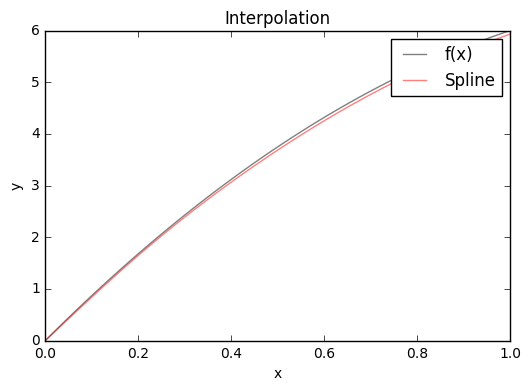

In [24]:
plot_interpolation(s_func1, step_numb=5)

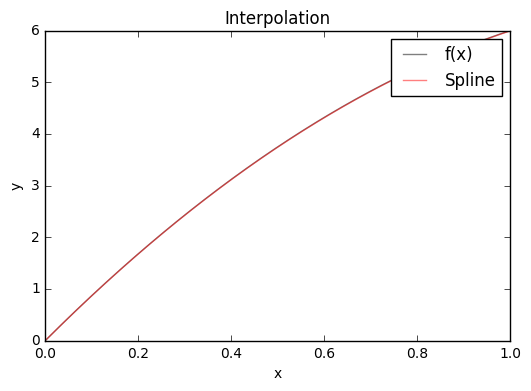

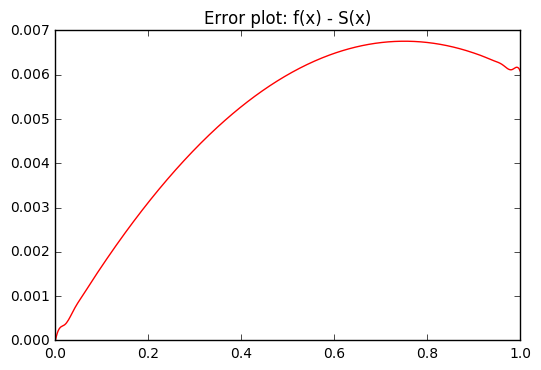

In [25]:
plot_interpolation(s_func1, step_numb=50, error_plot=True)

Видно, что для гладкой функции достаточно не густой сетки для хорошего приближения

#### Разрывная функция

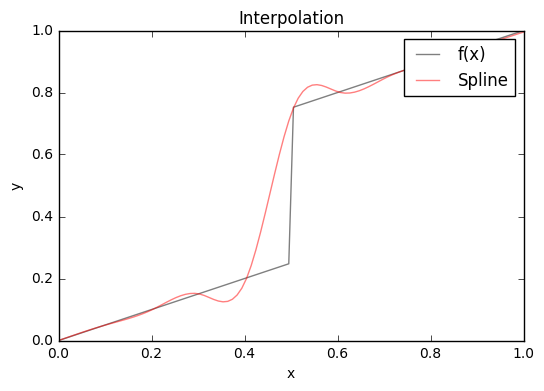

In [26]:
plot_interpolation(d_func1, step_numb=10)

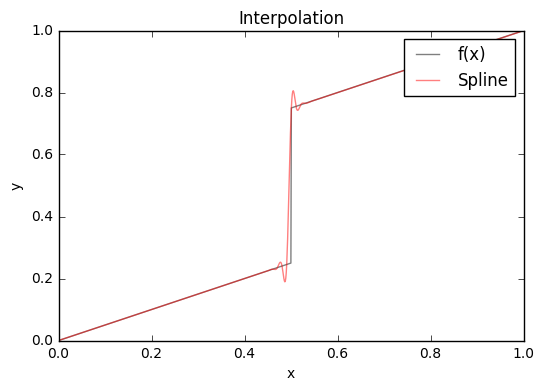

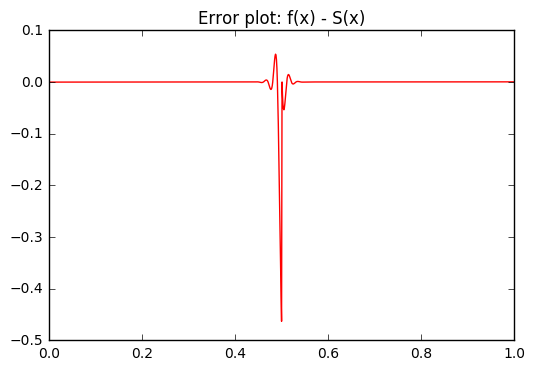

In [27]:
plot_interpolation(d_func1, step_numb=100, error_plot=True)

Для разрывной функции плохо приближает в месте разрыва, для густой сетки от 100 разбиений приближение хорошее

На графике ошибки видно, что ошибка везде нулевая, кроме места разрыва

#### Осциллирующая функция

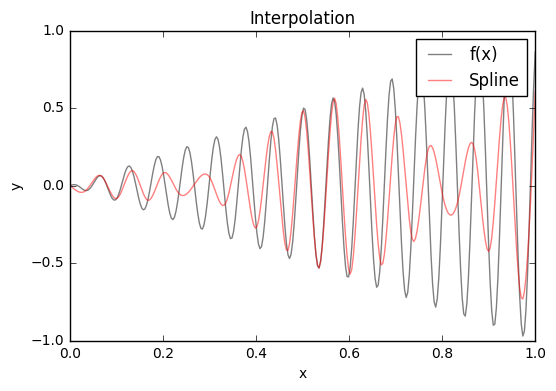

In [28]:
plot_interpolation(o_func1, step_numb=30)

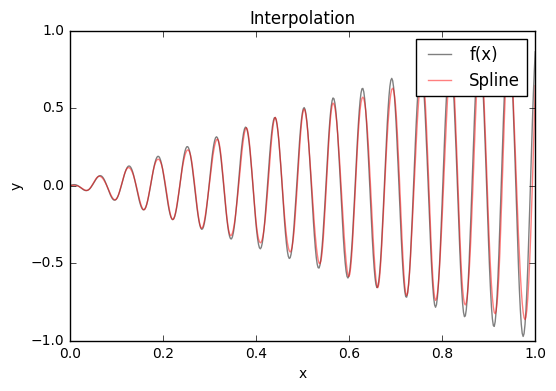

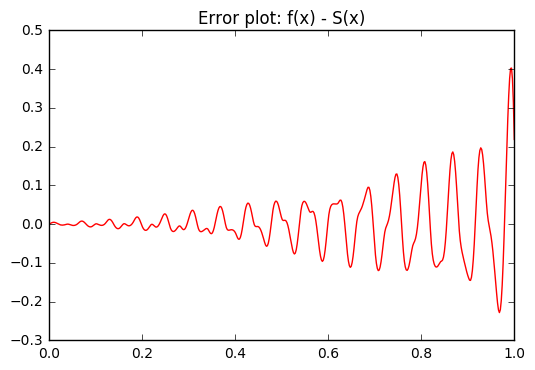

In [29]:
plot_interpolation(o_func1, step_numb=50, error_plot=True)

Для осцилирующей функции хорошее приближение для густый сеток от 50 разбиений

На графике ошибки видно, что ошибка увеличивается при увеличении аргумента

## Численное решение задачи Коши

$
\left\{
\begin{array}{ll}
    x_1' = f_1(t, x_1, x_2)\\
    x_2' = f_2(t, x_1, x_2)\\
    x_1(0) = x_{10}\\
    x_2(0) = x_{20}\\
\end{array}
\right.
$

###  Метод Рунге — Кутты четвёртого порядка

Приближенное значение в последующих точках вычисляется по итерационной формуле:

$i \in \{1, 2\}$

$
x_{i, n+1} = x_{i, n} + \frac{H}{6} (k_{1, i} + 2 k_{2, i} + 2 k_{3, i} + k_{4, i})
$,

где $k_{i}$ вычисляются по формулам:

$
k_{1, i} = f_i(t_n, x_{1, n}, x_{2, n})\\
k_{2, i} = f_i(t_n + \frac{H}{2}, x_{1, n} + \frac{H}{2} k_{1, 1}, x_{2, n} + \frac{H}{2} k_{1, 2})\\
k_{3, i} = f_i(t_n + \frac{H}{2}, x_{1, n} + \frac{H}{2} k_{2, 1}, x_{2, n} + \frac{H}{2} k_{2, 2})\\
k_{4, i} = f_i(t_n + H, x_{1, n} + H k_{3, 1}, x_{2, n} + H k_{3, 2})\\
$

$H = \frac{T}{h}$ - величина шага сетки по $t$

$h$ - количество разбиений

$t_j = \frac{T}{h} j$ - сетка, где $j=\{0, ..., h\}$

In [30]:
def cauchy(f1, f2, x10, x20, T, h):
    x1 = [x10]
    x2 = [x20]

    for i in range(h):
        k11 = f1(i*T/h, x1[-1], x2[-1])
        k12 = f2(i*T/h, x1[-1], x2[-1])
        k21 = f1(i*T/h + T/h/2, x1[-1] + T/h/2*k11, x2[-1] + T/h/2*k12)
        k22 = f2(i*T/h + T/h/2, x1[-1] + T/h/2*k11, x2[-1] + T/h/2*k12)
        k31 = f1(i*T/h + T/h/2, x1[-1] + T/h/2*k21, x2[-1] + T/h/2*k22)
        k32 = f2(i*T/h + T/h/2, x1[-1] + T/h/2*k21, x2[-1] + T/h/2*k22)
        k41 = f1(i*T/h + T/h, x1[-1] + T/h*k31, x2[-1] + T/h*k32)
        k42 = f2(i*T/h + T/h, x1[-1] + T/h*k31, x2[-1] + T/h*k32)
        
        x1.append(x1[-1] + T/h/6*(k11 + 2*k21 + 2*k31 + k41))
        x2.append(x2[-1] + T/h/6*(k12 + 2*k22 + 2*k32 + k42))
    
    return x1, x2

#### Пример

$
\left\{
\begin{array}{ll}
    x_1' = x_2\\
    x_2' = -x_1\\
    x_1(0) = 1\\
    x_2(0) = 1\\
\end{array}
\right.
$

Так как обе компоненты правой части непрерывны и их частные производные по $x_1$ и $x_2$ непрерывны, то вне зависимости от начальной точки по теореме о существовании и единственности задачи Коши существует окресность начальной точки, что задача Коши имеет единственное решение.

Решение:

$
\left\{
\begin{array}{ll}
    x_1 = cos(t) + sin(t)\\
    x_2 = cos(t) - sin(t)\\
\end{array}
\right.
$


In [31]:
def f1(t, x1, x2):
    return x2

def f2(t, x1, x2):
    return -x1

def true_x1(t):
    return np.cos(t) + np.sin(t)

def true_x2(t):
    return np.cos(t) - np.sin(t)

#### Векторное поле правой части

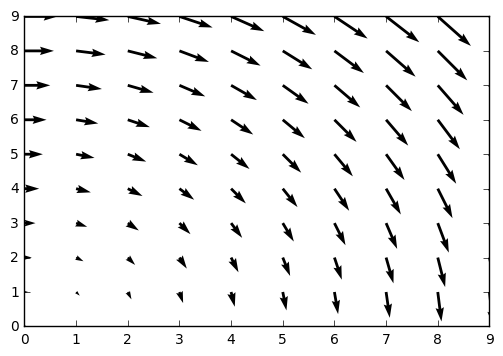

In [32]:
X, Y = np.mgrid[0:10, 0:10]
U = f1(0, X, Y)
V = f2(0, X, Y)
plt.quiver(X, Y, U, V)

#### Численная и аналитическая траектории

In [33]:
x10 = 1
x20 = 1
T = 1
h = 10

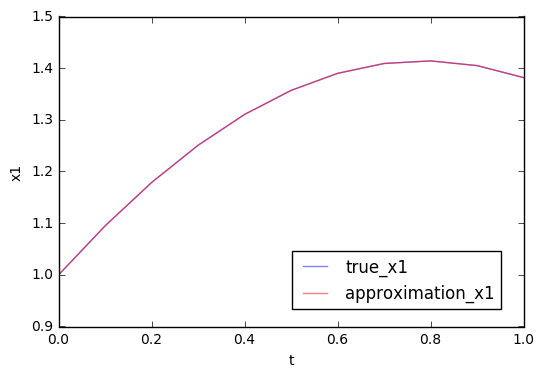

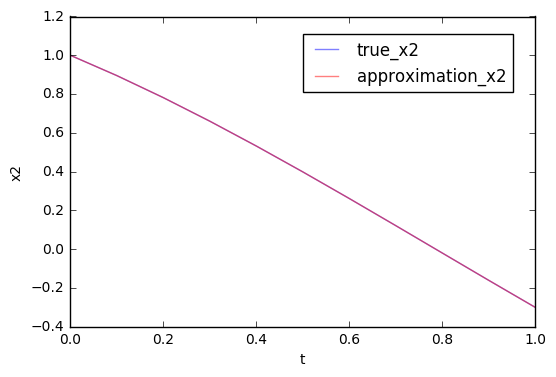

In [34]:
x1, x2 = cauchy(f1, f2, x10, x20, T, h)
t = np.linspace(0, T, h + 1)

plt.xlabel('t')
plt.ylabel('x1')
plt.plot(t, true_x1(t), "blue", label="true_x1", alpha=0.5)
plt.plot(t, x1, "red", label="approximation_x1", alpha=0.5)
plt.legend(bbox_to_anchor=(0.97, 0.27))
plt.show()

plt.xlabel('t')
plt.ylabel('x2')
plt.plot(t, true_x2(t), "blue", label="true_x2", alpha=0.5)
plt.plot(t, x2, "red", label="approximation_x2", alpha=0.5)
plt.legend(bbox_to_anchor=(0.97, 0.97))
plt.show()

#### Погрешность решения по сравнению с точным при уменьшающемся шаге сетки по равномерной (Чебышёвской) нормe

In [35]:
step = []
x1_error = []
x2_error = []
for segm in reversed(range(10, 1000)):
    x1, x2 = cauchy(f1, f2, x10, x20, T, segm)
    t = np.linspace(0, T, segm + 1)
    step.append(np.log(1/segm))
    x1_error.append(np.log(np.linalg.norm(x1 - true_x1(t), np.inf)))
    x2_error.append(np.log(np.linalg.norm(x2 - true_x2(t), np.inf)))

#### Графики погрешностей

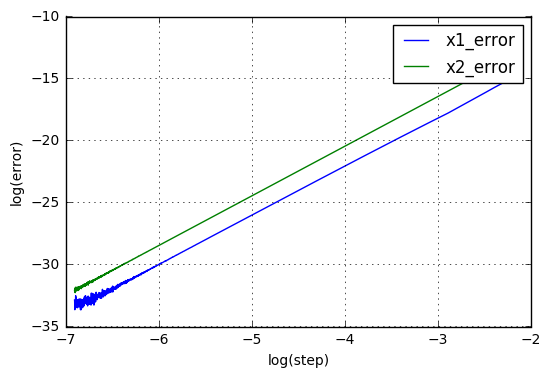

In [36]:
plt.plot(step, x1_error, label="x1_error")
plt.plot(step, x2_error, label="x2_error")
plt.xlabel("log(step)")
plt.ylabel("log(error)")
plt.legend()
plt.grid()

In [37]:
np.polyfit(step, x1_error, 1)

array([ 3.9226656 , -6.42152226])

То есть ошибка $E=-6.42*step^4$

In [38]:
np.polyfit(step, x2_error, 1)

array([ 4.00207584, -4.45190498])

То есть ошибка $E=-4.45*step^4$